In [ ]:
# importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import fftpack
from scipy.integrate import cumulative_trapezoid

In [ ]:
l = 589*10**(-9) # wavelength
s = 0.03 # wedge length
s_err = 0.001

In [ ]:
Misc = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/O9%20-%20Misc.csv')
Task1 = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/O9%20-%20Task%201.csv')
Task2 = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/O9%20-%20Task%202.csv')
Task3 = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/O9%20-%20Task%203.csv')


In the equation $r_k^2 = d(2R-d)$ we take $d << R$ giving:
$$ r_k^2 = 2Rd $$
The optical path difference is $$\Delta x= 2(d+d_0)+\frac{λ}{2}$$
For destructive interference we need $$\Delta x= (2k+1)\frac{λ}{2}$$
Which gives $$ 2d = kλ - 2d_0$$
Hence $$r_k^2 = Rλk - 2Rd_0$$
Which is the equation we will use for the fit.


In [ ]:
k = np.array(Task1['Ring nr'])
x1 = np.array(Task1['Position 1 (mm)'])*10**(-3)
x2 = np.array(Task1['Position 2 (mm)'])*10**(-3)
rk = (x1 - x2)/2

In [ ]:
def fit1(k, R, d0):
  return k*R*l - 2*R*d0

In [ ]:
k

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [ ]:
x1

array([0.0930763, 0.0928846, 0.0926943, 0.0925051, 0.0922716, 0.0920531,
       0.0917884, 0.0914897, 0.0911327, 0.0906435])

In [ ]:
popt1, pcov1 = curve_fit(fit1, k, rk**2, p0 = [1/l, 1])
popt1, np.sqrt(pcov1[0][0])

(array([2.07321476e+00, 4.38917974e-08]), 0.007417931968112018)

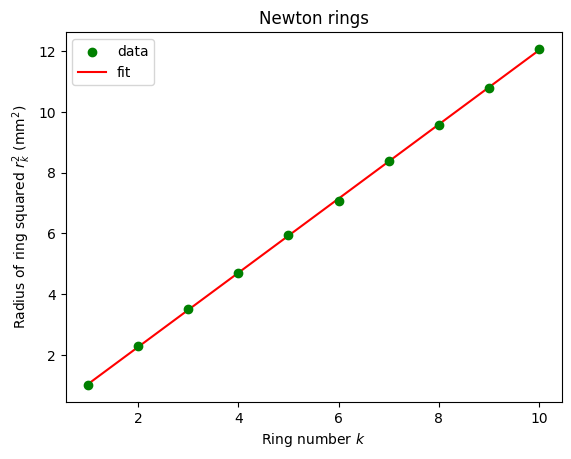

In [ ]:
plt.scatter(k, rk**2 *10**(6), c = 'g', label = 'data')
plt.plot(k, fit1(k, popt1[0], popt1[1]) *10**(6), c = 'r', zorder = -1, label = 'fit')
plt.xlabel('Ring number $k$')
plt.ylabel('Radius of ring squared $r_k^2$ (mm$^2$)')
plt.title('Newton rings')
plt.legend()
plt.savefig('task1.png')

# Task 2

In [ ]:
x_k = np.flip(np.array(Task2['Position (mm)']) * 10**(-3))
k2 = np.flip(k)
k2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
def wedge_fit(k, A, C):
  return k*A + C

In [ ]:
popt2, pcov2 = curve_fit(wedge_fit, k2, x_k, p0 = [0.0001, 0.0001])
popt2, np.sqrt(pcov2[0][0])

(array([0.00023859, 0.08375092]), 1.1947525985340549e-06)

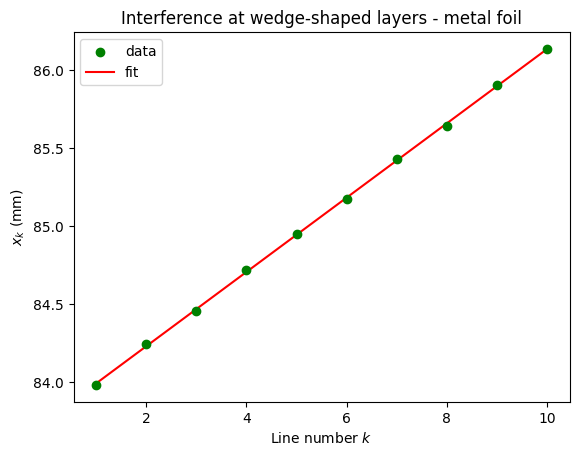

In [ ]:
plt.scatter(k2, x_k*1000, label = 'data', c = 'g')
plt.plot(k2, wedge_fit(k2, popt2[0], popt2[1])*1000, label = 'fit', c = 'r', zorder = -1)
plt.xlabel('Line number $k$')
plt.ylabel('$x_k$ (mm)')
plt.title('Interference at wedge-shaped layers - metal foil')
plt.legend()
plt.savefig('task2.png')

In [ ]:
D_fit = l*s/(2*popt2[0])
D_fit, np.sqrt(pcov2[0][0])

(3.702934618580106e-05, 1.1947525985340549e-06)

In [ ]:
err_1 = l/2 * s_err
err_2 = np.sqrt((err_1/(l*s/2))**2 + (np.sqrt(pcov2[0][0])/ popt2[0])**2) * (l*s/(2*popt2[0]))
err_2

1.2481613084817765e-06

In [ ]:
# from distance of neighbouring x_k (not necessary)
delta = (x_k[-1] - x_k[0])/len(x_k)
D_dist = l*s/(2*delta)
D_dist

4.094448048938731e-05

# Task 3

In [ ]:
x_k_2 = np.flip(np.array(Task3['Position (mm)']) * 10**(-3))
k3 = np.append(np.flip(k), 11)
k3

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
popt3, pcov3 = curve_fit(wedge_fit, k3, x_k_2, p0 = [0.0001, 0.01])
popt3

array([8.49018169e-05, 8.26888618e-02])

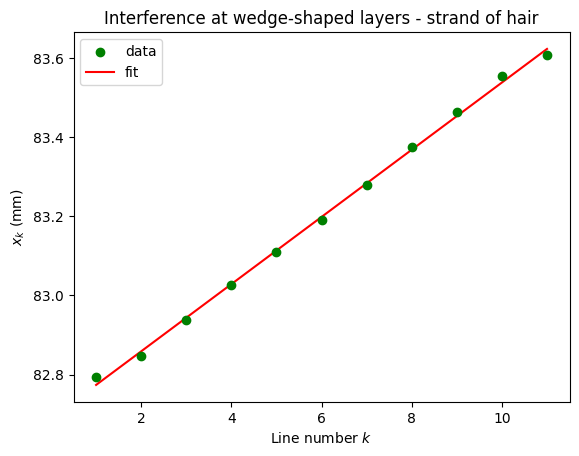

In [ ]:
plt.scatter(k3, x_k_2*1000, label = 'data', c = 'g')
plt.plot(k3, wedge_fit(k3, popt3[0], popt3[1])*1000, label = 'fit', c = 'r', zorder = -1)
plt.xlabel('Line number $k$')
plt.ylabel('$x_k$ (mm)')
plt.title('Interference at wedge-shaped layers - strand of hair')
plt.legend()
plt.savefig('task3.png')

In [ ]:
D_hair = l*s/(2*popt3[0])
D_hair

0.00010406137731928644

In [ ]:
err_3 = np.sqrt((err_1/(l*s/2))**2 + (np.sqrt(pcov3[0][0])/ popt3[0])**2) * (l*s/(2*popt3[0]))
err_3

3.7423338342779906e-06